In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

In [3]:
df.drop('PassengerId',axis=1,inplace=True)
df1.drop('PassengerId',axis=1,inplace=True)


In [4]:

df1.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
df1['Age'].fillna(df1.Age.median(), inplace=True)

df['Age'].fillna(df.Age.median(), inplace=True)

df1['Fare'].fillna(df1.Fare.median(), inplace=True)

df['Embarked'].fillna('C',inplace=True)

In [6]:
df1.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [7]:
df['Cabin'+'_NA'] = np.where(df['Cabin'].isnull(), 1, 0)

df1['Cabin'+'_NA'] = np.where(df1['Cabin'].isnull(), 1, 0)

In [8]:
# selecting random sample for filling the na values
random_sample = df['Cabin'].dropna().sample(df['Cabin'].isnull().sum(), random_state=0,replace=True)

# pandas needs to have the same index in order to merge datasets
random_sample.index = df[df['Cabin'].isnull()].index

# map the random sample to fill in the null values

df.loc[df['Cabin'].isnull(), 'Cabin'] = random_sample

In [9]:
# selecting random sample for filling the na values
random_sample = df1['Cabin'].dropna().sample(df1['Cabin'].isnull().sum(), random_state=0,replace=True)

# pandas needs to have the same index in order to merge datasets
random_sample.index = df1[df1['Cabin'].isnull()].index

# map the random sample to fill in the null values

df1.loc[df1['Cabin'].isnull(), 'Cabin'] = random_sample

In [10]:
df1['Cabin'] = df1['Cabin'].astype(str).str[0]

df['Cabin'] = df['Cabin'].astype(str).str[0]

df1.Cabin.unique()


array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)

In [11]:
import re

df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

df1['Title'] = df1.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [12]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Rare')

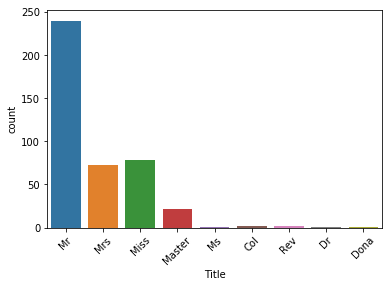

In [13]:
import seaborn as sns

sns.countplot(x='Title', data=df1);
plt.xticks(rotation=45);

In [14]:
df1['Title'] = df1['Title'].replace({'Ms':'Miss'})
df1['Title'] = df1['Title'].replace(['Dona', 'Rev', 'Dr',
                                            'Col'],'Rare')

In [15]:
for col in ['Sex', 'Cabin', 'Title','Embarked']:
    labels_dict = {k:i for i, k in enumerate(df[col].unique(), 0)}
    df1[col]=df1[col].map(labels_dict)

In [16]:
for col in ['Sex', 'Cabin', 'Title','Embarked']:
    labels_dict = {k:i for i, k in enumerate(df[col].unique(), 0)}
    df[col]=df[col].map(labels_dict)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_NA,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3,0,1,0


In [18]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df1.drop(['Name','Ticket'],axis=1,inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_NA,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,1,0,1
2,1,3,1,26.0,0,0,7.9250,2,0,1,2
3,1,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,3,0,1,0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.33, random_state=42)

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\salee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       175
           1       0.79      0.76      0.77       120

   micro avg       0.82      0.82      0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [24]:
pred=logmodel.predict(df1)

In [26]:
ss=pd.read_csv('test.csv')
ids = ss['PassengerId'].values

submission_file = open("submission2.csv", "w")


In [29]:

import csv as csv

open_file_object = csv.writer(submission_file)

# Write the header of the csv
open_file_object.writerow(["Id","SalePrice"])

# Write the rows of the csv
open_file_object.writerows(zip(ids, pred))

# Close the file
submission_file.close()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [43]:
data_dmatrix = xgb.DMatrix(data=df.drop('Survived',axis=1),label=df.Survived)

C:\Users\salee\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\salee\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [125]:
#params = {"objective":"reg:logistic", "max_depth":3,"colsample_bytree": 0.7,"gamma": 0.5,"learning_rate": 0.01,"lambda": 1,"reg_alpha": 0.1}

# Perform cross-validation: cv_results
#cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas= True, seed=123)

In [202]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
gbm_param_grid = {
    'n_estimators': range(1,500),
    'max_depth': range(2, 20),
    "colsample_bytree": np.linspace(0,1,10),
    "gamma": np.linspace(0,1,10),
    "learning_rate": np.linspace(0,0.05,10),
    "lambda": np.linspace(0,1,10),
    "reg_alpha": np.linspace(0,1,10)
}

gbm= xgb.XGBClassifier(n_estimators=10)
randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid,scoring='neg_mean_squared_error',n_iter=5,cv=3,verbose=1)

In [203]:
randomized_mse.fit(df.drop('Survived',axis=1),df['Survived'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'n_estimators': range(1, 500), 'max_depth': range(2, 20), 'colsample_bytree': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ]), 'gamma': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, ...([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ])},
          pre_dispatch='2*n_jobs', random_state=None, ref

In [204]:
randomized_mse.best_params_

{'reg_alpha': 0.6666666666666666,
 'n_estimators': 227,
 'max_depth': 13,
 'learning_rate': 0.03333333333333333,
 'lambda': 0.7777777777777777,
 'gamma': 1.0,
 'colsample_bytree': 0.4444444444444444}

In [205]:
xg_cl = xgb.XGBClassifier( objective='binary:logistic',max_depth=13,colsample_bytree = 0.4444444444444444,gamma = 1,learning_rate= 0.03333333333333333,reg_lambda= 0.7777777777777777,reg_alpha=0.6666666666666666,n_estimators=227, seed=123)


In [206]:
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4444444444444444, gamma=1,
       learning_rate=0.03333333333333333, max_delta_step=0, max_depth=13,
       min_child_weight=1, missing=None, n_estimators=227, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.6666666666666666, reg_lambda=0.7777777777777777,
       scale_pos_weight=1, seed=123, silent=True, subsample=1)

In [207]:
preds=xg_cl.predict(X_test)

In [208]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       175
           1       0.83      0.76      0.79       120

   micro avg       0.84      0.84      0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295



In [209]:
preds=xg_cl.predict(df1)


In [210]:
ss=pd.read_csv('test.csv')
ids = ss['PassengerId'].values

submission_file = open("submission2.csv", "w")

import csv as csv

open_file_object = csv.writer(submission_file)

# Write the header of the csv
open_file_object.writerow(["PassengerId","Survived"])

# Write the rows of the csv
open_file_object.writerows(zip(ids, preds))

# Close the file
submission_file.close()